In [1]:
import matplotlib.pyplot as plt
import numpy as np
import athena_read
import array as ar 
import os
import h5py

In [2]:
#Function for the theta component of velocity feild
def v_theta(t,p,N,a,theta_0):
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    s_max = 1/(np.tan(theta_0/2))
    c_2 = (s_max**2)*(N+1) + (N-1)
    c_1 = 2*a*((s_max)**N)*(1-((s_max)**2))
    c_0 = (N-1)+((N+1)*((s_max)**2))-((N+1)*(a**2)*((s_max)**(2*N)))-((N-1)*(a**2)*((s_max)**((2*N)+2)))
    b = ((-c_1) + (np.sqrt((c_1**2)-(4*c_2*c_0))))/(2*c_2)
    
    zmag2 = z*zbar
    vcoef = 1j*(zmag2 +1)/(2*np.sqrt(zmag2)) 
    g = a*(z**N)+b
    h = a*(zbar**N)+b
    frac = (N*a*b*((z**N) - (zbar**N)))/(1 + (g*h))
    return vcoef*frac

In [3]:
#Function for the phi component of velocity field
def v_phi(t,p,N,a,theta_0):    
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    s_max = 1/(np.tan(theta_0/2))
    c_2 = (s_max**2)*(N+1) + (N-1)
    c_1 = 2*a*((s_max)**N)*(1-((s_max)**2))
    c_0 = (N-1)+((N+1)*((s_max)**2))-((N+1)*(a**2)*((s_max)**(2*N)))-((N-1)*(a**2)*((s_max)**((2*N)+2)))
    b = ((-c_1) + (np.sqrt((c_1**2)-(4*c_2*c_0))))/(2*c_2)
    
    zmag2 = z*zbar
    ucoef = -(zmag2 +1)/(2*np.sqrt(zmag2)) 
    frac1 = ((N-1)*(1+zmag2)+2*zmag2)/(1+zmag2)
    g = a*(z**N)+b
    h = a*(zbar**N)+b
    frac2 = (N*a*((z**N)*h + (zbar**N)*g))/(1 + (g*h))
    return ucoef*(frac1-frac2)

In [4]:
#Function for theta component of velocity field when N=0
def v_theta_0(t,p):
    return 0*t +0*p

In [5]:
#Function for phi component of velocity field when N=0
def v_phi_0(t,p):
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    zmag2 = z*zbar
    return zmag2/np.sqrt(zmag2)

In [6]:
# Extract Athen grid from test problem
run_name = 'grids' #test run name
dump_dir = 'input_grid_directory' #directory for Athena test run
dump_tag = 'sog.out2.' #file name
i_dump = 0 #file number

In [7]:
# Where to write file
path_to_athena = 'output_directory'
write_path = path_to_athena 

In [8]:
# Load cell edge grid from Athena test file
dump = dump_tag + str(i_dump).zfill(5) + '.athdf'
print(dump_dir + dump)
athena_dic = athena_read.athdf(dump_dir + dump)
theta, phi = athena_dic['x2f'], athena_dic['x3f']

/Users/isabellathomas/Athena++/runs/sog_test/sog.out2.00000.athdf


In [9]:
# Calculate cell centered grid
theta_c = theta[:-1] + 0.5 * np.ediff1d(theta) #take theta component, delete 'j' character from string,
phi_c = phi[:-1] + 0.5 * np.ediff1d(phi) #add half the difference of adjacent angle values in the array

In [10]:
# Check theta indices
theta_indices = ar.array('i',(i for i in range(0,len(theta_c),1)))
print(theta_c)

[0.00613592 0.01840777 0.03067962 0.04295146 0.05522331 0.06749515
 0.079767   0.09203885 0.10431069 0.11658254 0.12885438 0.14112623
 0.15339808 0.16566992 0.17794177 0.19021362 0.20248547 0.21475731
 0.22702916 0.239301   0.25157285 0.26384467 0.27611655 0.28838837
 0.30066025 0.31293207 0.32520393 0.33747578 0.3497476  0.36201948
 0.3742913  0.38656318 0.398835   0.41110682 0.4233787  0.43565053
 0.4479224  0.46019423 0.47246608 0.48473793 0.49700975 0.50928164
 0.52155346 0.5338253  0.54609716 0.55836904 0.57064086 0.5829127
 0.59518456 0.6074564  0.6197282  0.6320001  0.64427197 0.65654373
 0.6688156  0.6810875  0.6933593  0.70563114 0.717903   0.7301749
 0.74244666 0.75471854 0.7669904  0.77926224 0.79153407 0.80380595
 0.81607777 0.8283496  0.8406215  0.85289335 0.8651652  0.877437
 0.8897089  0.9019807  0.9142525  0.9265244  0.9387963  0.95106804
 0.9633399  0.9756118  0.9878836  1.0001554  1.0124273  1.0246992
 1.036971   1.0492429  1.0615147  1.0737865  1.0860584  1.0983303
 

In [11]:
# Generate meshgrid grid
theta_grid, phi_grid = np.meshgrid(theta,phi)
print("phi.shape = {}, theta.shape = {}".format(phi.shape,theta.shape)) #make sure they're the same size

phi.shape = (513,), theta.shape = (257,)


In [12]:
# Generate cell-centered meshgrid grid
theta_c_grid, phi_c_grid = np.meshgrid(theta_c,phi_c)
print("phi_c.shape = {}, theta_c.shape = {}".format(phi_c.shape,theta_c.shape)) #same size?

phi_c.shape = (512,), theta_c.shape = (256,)


In [13]:
#Define inputs for functions
t = theta_c_grid
p = phi_c_grid

#Define parameter values
N=0
a=2
theta_0=np.pi/2

In [14]:
# Take function values for input grid
if N==0:
    v_t = v_theta_0(t,p)
    v_p = v_phi_0(t,p)
else:
    v_t = v_theta(t,p,N,a,theta_0)
    v_p = v_phi(t,p,N,a,theta_0)

In [15]:
#Create output file
f = open(write_path + run_name + '_N0' + '_' + '256' + 'by' + '512' + '.tab', 'w')
print ("\nWriting output to\n: {}".format(write_path)) #check
#Write velocities at each point on the grid to a tab file
for k in range(len(phi_c)):
    print ("phi = {} deg".format(phi_c[k]*180./np.pi)) #check
    for j in range(len(theta_c)):
        if N==0:
            f.write(repr(v_t[k,j])); f.write('\t')
            f.write(repr(v_p[k,j])[1:-4]); f.write('\t')
            f.write('\n')
        else:
            f.write(repr(v_t[k,j])[1:-4]); f.write('\t')
            f.write(repr(v_p[k,j])[1:-4]); f.write('\t')
            f.write('\n')
f.close()


Writing output to
: /Users/isabellathomas/Athena++/athena-public-version/
phi = 0.3515625097831178 deg
phi = 1.054687502668927 deg
phi = 1.7578125755960157 deg
phi = 2.460937648523104 deg
phi = 3.164062508006781 deg
phi = 3.8671873674904584 deg
phi = 4.570312653860959 deg
phi = 5.273437513344636 deg
phi = 5.976562372828313 deg
phi = 6.679687659198812 deg
phi = 7.3828120917956666 deg
phi = 8.085937378166166 deg
phi = 8.789062664536667 deg
phi = 9.49218709713352 deg
phi = 10.195312383504021 deg
phi = 10.898437669874522 deg
phi = 11.60156295624502 deg
phi = 12.304687388841876 deg
phi = 13.007812675212374 deg
phi = 13.71093710780923 deg
phi = 14.414062394179728 deg
phi = 15.117185973002936 deg
phi = 15.82031296692073 deg
phi = 16.523436545743937 deg
phi = 17.22656353966173 deg
phi = 17.92968711848494 deg
phi = 18.632812404855436 deg
phi = 19.335937691225936 deg
phi = 20.039061270049146 deg
phi = 20.742188263966938 deg
phi = 21.445311842790144 deg
phi = 22.14843883670794 deg
phi = 22.85156

In [16]:
#Plot the velocity field as a check
#Define grids - projected onto cartesian basis
x_grid = np.sin(theta_c_grid) * np.cos(phi_c_grid)
y_grid = np.sin(theta_c_grid) * np.sin(phi_c_grid)
z_grid = np.cos(theta_c_grid)

v_x = v_t*np.cos(theta_c_grid)*np.cos(phi_c_grid) - v_p*np.sin(phi_c_grid)
v_y = v_t*np.cos(theta_c_grid)*np.sin(phi_c_grid) + v_p*np.cos(phi_c_grid)
v_z = -v_t*np.sin(theta_c_grid)

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:2588: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:argi]).astype(float)


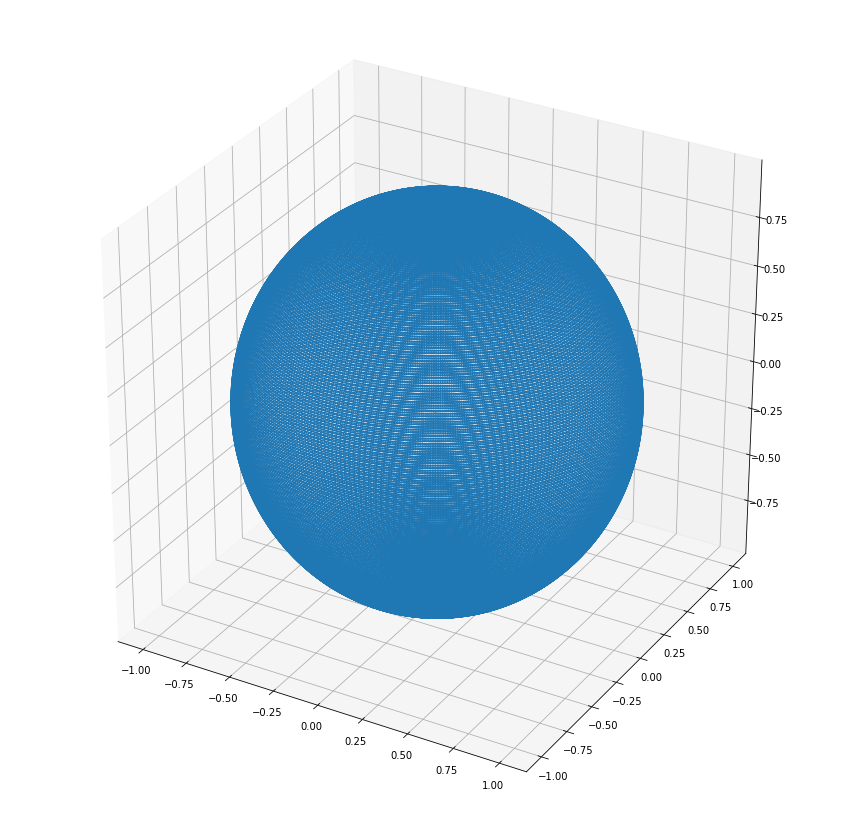

In [18]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.quiver(x_grid, y_grid, z_grid, v_x, v_y, v_z, length=0.01, normalize=True, arrow_length_ratio=0.5)
plt.show()